# CS5002: Programming Principles and Practice

## Practical P3: Data analysis and visualisation Python

In [1]:
import json
import pandas as pd

We start with exploring the content of the dataset.

In [2]:
df = pd.read_csv("../data/census-2021-public-microdata-teaching-sample.csv")

In [3]:
df

,SerialNum,AGE_BAND_AGG8,COB_AGG3,ECONOMIC_ACTIVITY_10M,ETHNIC_GROUP_AGG2,HEALTH_IN_GENERAL,FAMILY_TYPE,HH_SOCGRADE4,HOURS_PER_WEEK_WORKED,IN_FULL_TIME_EDUCATION,INDUSTRY_CURRENT_10A,LEGAL_PARTNERSHIP_STATUS_6A,OCCUPATION_CURRENT_1DIGIT,RELIGION_BELONG_TO,RELIGION_BROUGHT_UP_IN,SEX,UR_RESIDENCE_TYPE
0,1,2,1,1,1,2,4,3,2,2,8,1,4,1,-8,1,1
1,2,7,1,1,1,5,2,-8,1,2,8,2,2,3,-8,2,1
2,3,7,1,5,1,4,2,-8,-8,2,-8,2,-8,1,-8,2,1
3,4,7,1,7,1,1,2,-8,-8,2,-8,2,-8,8,2,1,1
4,5,3,1,1,1,2,2,3,4,2,4,1,8,1,-8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,16890,6,1,1,1,3,1,4,3,2,7,1,9,2,-8,2,1
16890,16891,2,1,6,1,2,5,3,-8,1,-8,1,-8,1,-8,2,1
16891,16892,3,1,1,1,1,4,4,2,2,8,1,6,1,-8,1,1
16892,16893,6,1,3,1,4,2,4,-8,2,-8,2,-8,2,-8,1,1


Next, we read the JSON file with the interpretations of categories.

In [4]:
with open("../data/data_dictionary.json", "r") as read_file:
    labels = json.load(read_file)

In [5]:
labels

{'FAMILY_TYPE': {'1': 'Not in a family',
  '2': 'Married or civil partnership couple family',
  '3': 'Cohabiting couple family',
  '4': 'Lone parent family (female)',
  '5': 'Lone parent family (male)',
  '-8': 'No code required (CE residents)'},
 'UR_RESIDENCE_TYPE': {'1': 'Resident in a household',
  '2': 'Resident in a communal establishment'},
 'AGE_BAND_AGG8': {'1': '0-15 years',
  '2': '16-24 years',
  '3': '25-34 years',
  '4': '35-44 years',
  '5': '45-54 years',
  '6': '55-64 years',
  '7': '65-74 years',
  '8': '75+ years'},
 'ECONOMIC_ACTIVITY_10M': {'1': 'Economically active (excluding full-time students): Employee',
  '2': 'Economically active (excluding full-time students): Self-employed',
  '3': 'Economically active (excluding full-time students): Unemployed',
  '4': 'Economically active: Full-time student',
  '5': 'Economically Inactive: Retired',
  '6': 'Economically Inactive: Student',
  '7': 'Economically Inactive: Looking after family or home',
  '8': 'Economically 

In [6]:
labels['FAMILY_TYPE']['2']

'Married or civil partnership couple family'

## **Basic requirements**

For census data (df) - Check that length of data matches total row number table above

In [7]:
df['SerialNum']

0            1
1            2
2            3
3            4
4            5
         ...  
16889    16890
16890    16891
16891    16892
16892    16893
16893    16894
Name: SerialNum, Length: 16894, dtype: int64

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
 
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows.")

No duplicate rows.


### **1. Refine the dataset - write, import, and run script for proper refinement**

**Run Script**

In [9]:
%run ../code/refine.py ../data/census-2021-public-microdata-teaching-sample.csv ../data/data_dictionary.json

Loaded 16894 rows
Removed 0 duplicate rows
CE residents code '-8' replaced with NaN.
Refined data saved to ../data/refined_census_data.csv
Final data shape: (16894, 17)


**Check new refined file**

In [10]:
refined_df = pd.read_csv("../data/refined_census_data.csv")
refined_df

,SerialNum,AGE_BAND_AGG8,COB_AGG3,ECONOMIC_ACTIVITY_10M,ETHNIC_GROUP_AGG2,HEALTH_IN_GENERAL,FAMILY_TYPE,HH_SOCGRADE4,HOURS_PER_WEEK_WORKED,IN_FULL_TIME_EDUCATION,INDUSTRY_CURRENT_10A,LEGAL_PARTNERSHIP_STATUS_6A,OCCUPATION_CURRENT_1DIGIT,RELIGION_BELONG_TO,RELIGION_BROUGHT_UP_IN,SEX,UR_RESIDENCE_TYPE
0,1,2,1,1.0,1,2,4,3.0,2.0,2.0,8.0,1.0,4.0,1,NaN,1,1
1,2,7,1,1.0,1,5,2,NaN,1.0,2.0,8.0,2.0,2.0,3,NaN,2,1
2,3,7,1,5.0,1,4,2,NaN,NaN,2.0,NaN,2.0,NaN,1,NaN,2,1
3,4,7,1,7.0,1,1,2,NaN,NaN,2.0,NaN,2.0,NaN,8,2.0,1,1
4,5,3,1,1.0,1,2,2,3.0,4.0,2.0,4.0,1.0,8.0,1,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,16890,6,1,1.0,1,3,1,4.0,3.0,2.0,7.0,1.0,9.0,2,NaN,2,1
16890,16891,2,1,6.0,1,2,5,3.0,NaN,1.0,NaN,1.0,NaN,1,NaN,2,1
16891,16892,3,1,1.0,1,1,4,4.0,2.0,2.0,8.0,1.0,6.0,1,NaN,1,1
16892,16893,6,1,3.0,1,4,2,4.0,NaN,2.0,NaN,2.0,NaN,2,NaN,1,1


### **2. Descriptive Analysis**

**Total Number of Records**

In [11]:
total_records = len(refined_df)

In [12]:
print(f"The total number of records in the dataset is {total_records}")

The total number of records in the dataset is 16894


**Type of Each Variable in the Dataset**

In [13]:
refined_df.dtypes

SerialNum                        int64
AGE_BAND_AGG8                    int64
COB_AGG3                         int64
ECONOMIC_ACTIVITY_10M          float64
ETHNIC_GROUP_AGG2                int64
HEALTH_IN_GENERAL                int64
FAMILY_TYPE                      int64
HH_SOCGRADE4                   float64
HOURS_PER_WEEK_WORKED          float64
IN_FULL_TIME_EDUCATION         float64
INDUSTRY_CURRENT_10A           float64
LEGAL_PARTNERSHIP_STATUS_6A    float64
OCCUPATION_CURRENT_1DIGIT      float64
RELIGION_BELONG_TO               int64
RELIGION_BROUGHT_UP_IN         float64
SEX                              int64
UR_RESIDENCE_TYPE                int64
dtype: object

**Find all different values that it takes and the number of occurrences for each value** (except for SerialNum)

In [14]:
for col in refined_df.columns:
    if col != 'SerialNum':
        counts = refined_df[col].value_counts() #source: Pokemons class example
        print(counts, "\n")

AGE_BAND_AGG8
1    3555
5    2295
4    2252
6    2192
3    2070
2    1685
7    1584
8    1261
Name: count, dtype: int64 

COB_AGG3
1    14675
3     1118
2     1101
Name: count, dtype: int64 

ECONOMIC_ACTIVITY_10M
1.0    6181
5.0    2679
2.0    1133
8.0     950
7.0     707
6.0     616
9.0     402
4.0     344
3.0     327
Name: count, dtype: int64 

ETHNIC_GROUP_AGG2
1    16334
2      560
Name: count, dtype: int64 

HEALTH_IN_GENERAL
1    8508
2    4819
3    2311
4     959
5     297
Name: count, dtype: int64 

FAMILY_TYPE
2    9632
1    2770
4    2631
3    1529
5     332
Name: count, dtype: int64 

HH_SOCGRADE4
2.0    4047
4.0    3469
3.0    3262
1.0    2799
Name: count, dtype: int64 

HOURS_PER_WEEK_WORKED
3.0    4536
2.0    1575
1.0     775
4.0     701
Name: count, dtype: int64 

IN_FULL_TIME_EDUCATION
2.0    12401
1.0     3547
Name: count, dtype: int64 

INDUSTRY_CURRENT_10A
8.0    2565
5.0    1564
7.0    1050
4.0     660
2.0     646
6.0     556
9.0     270
1.0     183
3.0      93
Nam

### **3. Plots**

**Bar chart for the number of records for each age category**

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
agecat_records = refined_df['AGE_BAND_AGG8'].value_counts()
agecat_records

AGE_BAND_AGG8
1    3555
5    2295
4    2252
6    2192
3    2070
2    1685
7    1584
8    1261
Name: count, dtype: int64

Currently the output displays age band variable as alphanumeric codes, but textual interpretations from the data dictionary will make output more meaningful.

In [17]:
#Mapping codes to values
age_mapping = {float(k): v for k, v in labels['AGE_BAND_AGG8'].items()}

agecat_records = refined_df['AGE_BAND_AGG8'].value_counts().rename(age_mapping)
agecat_records

AGE_BAND_AGG8
0-15 years     3555
45-54 years    2295
35-44 years    2252
55-64 years    2192
25-34 years    2070
16-24 years    1685
65-74 years    1584
75+ years      1261
Name: count, dtype: int64

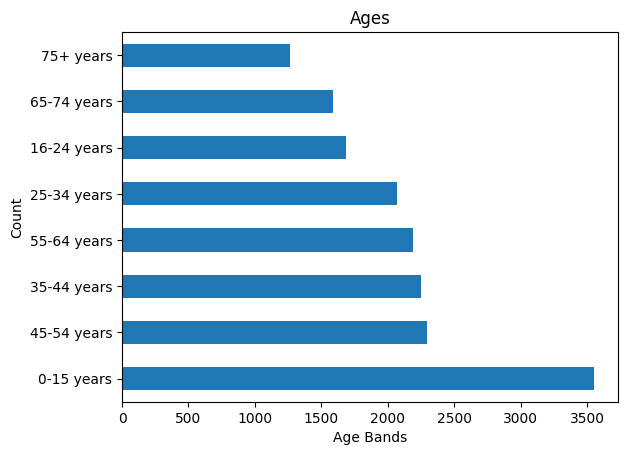

In [18]:
agecat_records.plot(kind='barh', legend=False)
plt.xlabel('Age Bands')
plt.ylabel('Count')
plt.title('Ages')
plt.show()

**Bar Chart for the number of records for each economic activity caterory**

In [19]:
#Mapping codes to values
econ_mapping = {float(k): v for k, v in labels['ECONOMIC_ACTIVITY_10M'].items()}

econ_records = refined_df['ECONOMIC_ACTIVITY_10M'].value_counts().rename(econ_mapping)
econ_records

ECONOMIC_ACTIVITY_10M
Economically active (excluding full-time students): Employee         6181
Economically Inactive: Retired                                       2679
Economically active (excluding full-time students): Self-employed    1133
Economically Inactive: Long term sick or disabled                     950
Economically Inactive: Looking after family or home                   707
Economically Inactive: Student                                        616
Economically inactive: Other                                          402
Economically active: Full-time student                                344
Economically active (excluding full-time students): Unemployed        327
Name: count, dtype: int64

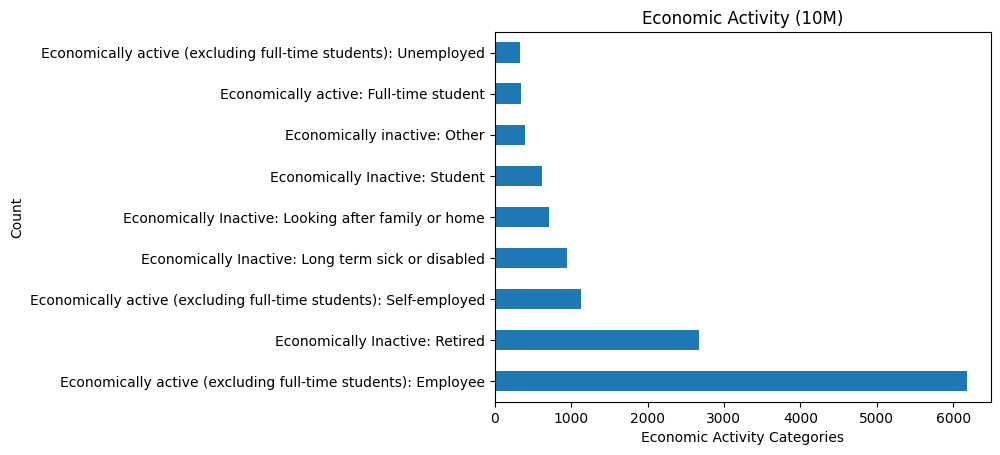

In [20]:
econ_records.plot(kind='barh', legend=False)
plt.xlabel('Economic Activity Categories')
plt.ylabel('Count')
plt.title('Economic Activity (10M)')
plt.show()

## **Additional requirements**

### **Easy**

**Pie chart for the percentage of records for each general health category**

In [21]:
#Mapping codes to values
health_mapping = {float(k): v for k, v in labels['HEALTH_IN_GENERAL'].items()}

health_cat = refined_df['HEALTH_IN_GENERAL'].value_counts().rename(health_mapping)
health_cat

HEALTH_IN_GENERAL
Very Good Heath    8508
Good health        4819
Fair health        2311
Bad health          959
Very bad health     297
Name: count, dtype: int64

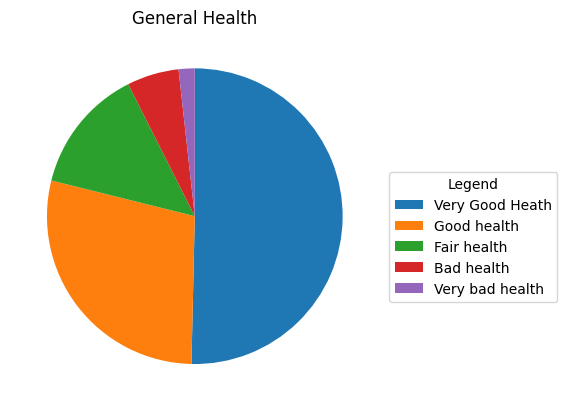

In [22]:
#Building visually appealing and readable pie chart

health_cat.plot(kind='pie', startangle=90, counterclock=False, labels=None)
plt.ylabel('')
plt.title('General Health')
#source: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.legend.html#matplotlib.figure.Figure.legend
plt.legend(labels=health_cat.index, loc="lower right", bbox_to_anchor=(1.5, 0.25), title="Legend")
plt.show()

**Pie chart for the percentage of records for each working hours per week category**

In [23]:
#Mapping codes to values
hpww_mapping = {float(k): v for k, v in labels['HOURS_PER_WEEK_WORKED'].items()}

hpww_cat = refined_df['HOURS_PER_WEEK_WORKED'].value_counts().rename(hpww_mapping)
hpww_cat

HOURS_PER_WEEK_WORKED
31 to 48 hours      4536
16 to 30 hours      1575
0 to 15 hours        775
49 or more hours     701
Name: count, dtype: int64

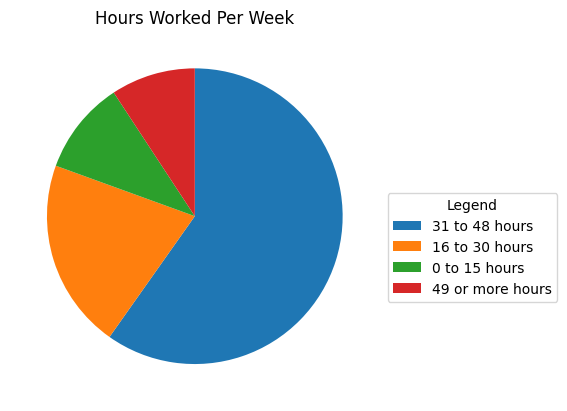

In [24]:
hpww_cat.plot(kind='pie', startangle=90, counterclock=False, labels=None)
plt.ylabel('')
plt.title('Hours Worked Per Week')
plt.legend(labels=hpww_cat.index, loc="lower right", bbox_to_anchor=(1.5, 0.25), title="Legend")
plt.show()

### **Medium**

**Number of records depending on hours worked per week and general health description**

In [25]:
#Using groupby objects to produce 2 dimensional table
work_vs_health = refined_df.groupby(['HOURS_PER_WEEK_WORKED', 'HEALTH_IN_GENERAL'])['SerialNum'].count().unstack(fill_value=0)

#Map codes to values
work_vs_health_mapped = work_vs_health.rename(index=hpww_mapping, columns=health_mapping)

work_vs_health_mapped

HEALTH_IN_GENERAL,Very Good Heath,Good health,Fair health,Bad health,Very bad health
HOURS_PER_WEEK_WORKED,,,,,
0 to 15 hours,431,238,79,20,7
16 to 30 hours,766,607,169,26,7
31 to 48 hours,2507,1590,375,58,6
49 or more hours,407,221,69,3,1


In [26]:
print(f"Total number of records: {work_vs_health_mapped.sum().sum()}")

Total number of records: 7587


In [27]:
#Cross reference refined_df to double check if total number of records matches (in cases there were errors with building the table)
subset_df = refined_df[['HOURS_PER_WEEK_WORKED', 'HEALTH_IN_GENERAL']] #Objects in groupby
total = subset_df.dropna().shape[0] #In case of NaN

if total == work_vs_health_mapped.sum().sum():
    print(f"Total number of records in the work_vs_health_mapped table matches the data in redined_df: {total}")

else:
    print("Total number of records in table work_vs_health_mapped table does not match data in refinded_df.")

Total number of records in the work_vs_health_mapped table matches the data in redined_df: 7587


**Number of records depending on age and current occupation**

In [28]:
#Mapping codes to values for occupation data
occupation_mapping = {float(k): v for k, v in labels['OCCUPATION_CURRENT_1DIGIT'].items()}

#Using groupby objects to produce 2 dimensional table
age_vs_job = refined_df.groupby(['AGE_BAND_AGG8', 'OCCUPATION_CURRENT_1DIGIT'])['SerialNum'].count().unstack(fill_value=0)

#Map codes to values
age_vs_job_mapped = age_vs_job.rename(index=age_mapping, columns=occupation_mapping)
age_vs_job_mapped 

OCCUPATION_CURRENT_1DIGIT,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
AGE_BAND_AGG8,,,,,,,,,
16-24 years,11,107,54,67,117,104,197,47,123
25-34 years,91,428,194,164,190,183,158,85,165
35-44 years,215,439,193,188,205,172,103,132,133
45-54 years,209,366,145,245,225,154,100,143,151
55-64 years,146,213,92,158,190,143,92,133,123
65-74 years,25,31,17,27,41,27,22,28,38
75+ years,5,3,1,6,14,0,4,0,5


In [29]:
print(f"Total number of records: {age_vs_job_mapped.sum().sum()}")

Total number of records: 7587


In [30]:
#Cross reference refined_df to double check if total number of records matches (in cases there were errors with building the table)
subset_df = refined_df[['AGE_BAND_AGG8', 'OCCUPATION_CURRENT_1DIGIT']] #Objects in groupby
total = subset_df.dropna().shape[0] #In case of NaN

if total == work_vs_health_mapped.sum().sum():
    print(f"Total number of records in the age_vs_job_mapped table matches data in refined_df: {total}")

else:
    print("Total number of records in table age_vs_job_mapped table does not match data in refinded_df.")

Total number of records in the age_vs_job_mapped table matches data in refined_df: 7587


**Number of economically active people depending on age**

In [31]:
#Slicing econ_mapping form previous cell to get only economically active data
econactive_codes = list(econ_mapping.keys())[:4]
econ_active = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(econactive_codes)]

active_by_age = econ_active.groupby(['AGE_BAND_AGG8', 'ECONOMIC_ACTIVITY_10M']).size()

active_by_age_mapped = active_by_age.rename(age_mapping, level='AGE_BAND_AGG8').rename(econ_mapping, level='ECONOMIC_ACTIVITY_10M').unstack(fill_value=0)
active_by_age_mapped

ECONOMIC_ACTIVITY_10M,Economically active (excluding full-time students): Employee,Economically active (excluding full-time students): Self-employed,Economically active (excluding full-time students): Unemployed,Economically active: Full-time student
AGE_BAND_AGG8,,,,
16-24 years,557,30,84,308
25-34 years,1462,174,66,25
35-44 years,1526,247,65,7
45-54 years,1440,295,58,3
55-64 years,1018,271,49,1
65-74 years,167,89,5,0
75+ years,11,27,0,0


**Number of economically inactive people depending on a health descriptor**

In [32]:
health_descriptors = {
    1: 'Very Good Heath',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health'
}

In [33]:
econinactive_dict = {
    5: 'Economically Inactive: Retired',
    6: 'Economically Inactive: Student',
    7: 'Economically Inactive: Looking after family or home',
    8: 'Economically Inactive: Long term sick or disabled',
    9: 'Economically inactive: Other'
}

In [34]:
#Slicing econ_mapping form previous cell to get only economically active data
econinactive_codes = list(econ_mapping.keys())[5:]
econ_inactive = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(econinactive_codes)]

inactive_by_health = econ_inactive.groupby(['HEALTH_IN_GENERAL', 'ECONOMIC_ACTIVITY_10M']).size()

inactive_by_health_mapped = inactive_by_health.rename(health_mapping, level='HEALTH_IN_GENERAL').rename(econ_mapping, level='ECONOMIC_ACTIVITY_10M').unstack(fill_value=0)
inactive_by_health_mapped

ECONOMIC_ACTIVITY_10M,Economically Inactive: Long term sick or disabled,Economically Inactive: Looking after family or home,Economically Inactive: Student,Economically inactive: Other
HEALTH_IN_GENERAL,,,,
Bad health,383,44,11,41
Fair health,289,161,36,109
Good health,88,275,140,118
Very Good Heath,31,220,427,123
Very bad health,159,7,2,11


**Number of working hours per week for students**

In [35]:
#Index just 4 and 6 from 'ECONOMIC_ACTIVITY_10M' to get data about students
student_status = list(econ_mapping.keys())[3:6:2]
student_status

[4.0, 6.0]

In [36]:
econ_students = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(student_status)]
student_work = econ_students.groupby(['HOURS_PER_WEEK_WORKED', 'ECONOMIC_ACTIVITY_10M']).size()

student_work_mapped = student_work.rename(hpww_mapping, level='HOURS_PER_WEEK_WORKED').rename(econ_mapping, level='ECONOMIC_ACTIVITY_10M').unstack(fill_value=0)
student_work_mapped

ECONOMIC_ACTIVITY_10M,Economically active: Full-time student
HOURS_PER_WEEK_WORKED,
0 to 15 hours,154
16 to 30 hours,70
31 to 48 hours,46
49 or more hours,3


### **Hard**